In [1]:
import pandas as pd

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
column_names = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 
                'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 
                'engine_type', 'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 
                'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
automobile_data = pd.read_csv(url, names=column_names, na_values='?')

In [3]:
# Xử lý dữ liệu bị thiếu
automobile_data.dropna(inplace=True)

In [4]:
X = automobile_data.drop(columns=['price'])
y = automobile_data['price']

In [5]:
num_cols = X.select_dtypes(include=['int','float']).columns
num_cols

Index(['symboling', 'normalized_losses', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg'],
      dtype='object')

In [6]:
from sklearn.feature_selection import SelectKBest, f_regression

In [7]:
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X[num_cols], y)

SelectKBest(k='all', score_func=<function f_regression at 0x0000020B3CE47790>)

In [8]:
df_scores = pd.DataFrame(selector.scores_)
df_columns = pd.DataFrame(num_cols)

In [9]:
feature_scores = pd.concat([df_columns, df_scores], axis=1) # merge
feature_scores.columns = ['Feature', 'Score']
feature_scores.sort_values(by='Score', ascending=False, inplace=True)
feature_scores

,Feature,Score
6,curb_weight,622.507422
4,width,386.767806
7,engine_size,380.882793
3,length,215.964328
11,horsepower,214.517098
2,wheel_base,183.838418
14,highway_mpg,169.084529
13,city_mpg,144.483602
8,bore,62.592369
5,height,10.011468


In [10]:
df_sub = feature_scores[feature_scores['Score']>=100]
df_sub

,Feature,Score
6,curb_weight,622.507422
4,width,386.767806
7,engine_size,380.882793
3,length,215.964328
11,horsepower,214.517098
2,wheel_base,183.838418
14,highway_mpg,169.084529
13,city_mpg,144.483602


In [11]:
feature_lst = df_sub['Feature'].tolist()+['price']
feature_lst

['curb_weight',
 'width',
 'engine_size',
 'length',
 'horsepower',
 'wheel_base',
 'highway_mpg',
 'city_mpg',
 'price']

In [12]:
# đo correlation
df_corr = automobile_data[feature_lst].corr()
df_corr

,curb_weight,width,engine_size,length,horsepower,wheel_base,highway_mpg,city_mpg,price
curb_weight,1.000000,0.870595,0.888626,0.871291,0.790095,0.810181,-0.789338,-0.762155,0.893639
width,0.870595,1.000000,0.779253,0.838338,0.681872,0.814991,-0.693339,-0.666684,0.843371
engine_size,0.888626,0.779253,1.000000,0.725953,0.812073,0.649206,-0.714095,-0.699139,0.841496
length,0.871291,0.838338,0.725953,1.000000,0.672063,0.871534,-0.724599,-0.724544,0.760952
horsepower,0.790095,0.681872,0.812073,0.672063,1.000000,0.516948,-0.827941,-0.837214,0.759874
wheel_base,0.810181,0.814991,0.649206,0.871534,0.516948,1.000000,-0.611750,-0.580657,0.734419
highway_mpg,-0.789338,-0.693339,-0.714095,-0.724599,-0.827941,-0.611750,1.000000,0.971999,-0.720090
city_mpg,-0.762155,-0.666684,-0.699139,-0.724544,-0.837214,-0.580657,0.971999,1.000000,-0.692273
price,0.893639,0.843371,0.841496,0.760952,0.759874,0.734419,-0.720090,-0.692273,1.000000


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

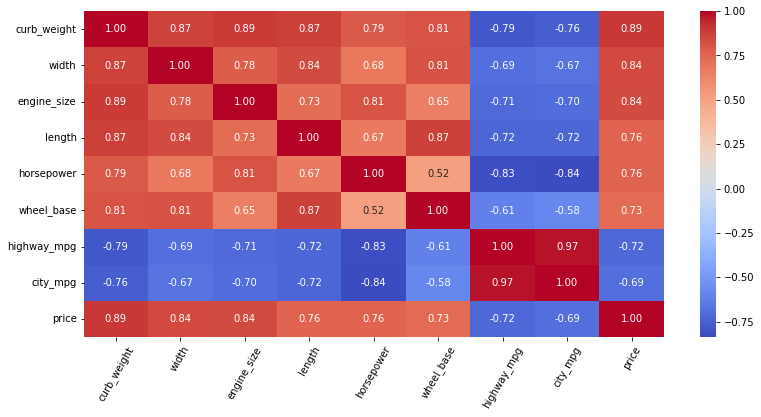

In [14]:
plt.figure(figsize=(13,6))
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.xticks(rotation=60)
plt.show()

### Xây dựng mô hình Linear Regression

In [15]:
X = automobile_data[feature_lst].drop(columns=['price']) # biến inputs
y = automobile_data['price'] # biến output

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
print('The train R-square is:', model.score(X_train,y_train))
print('The test R-square is:', model.score(X_test,y_test))
# hiện tượng overfitting

The train R-square is: 0.8536693157580417
The test R-square is: 0.6084795215762591
